In [1]:
import warnings
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [2]:
driver = webdriver.Chrome()
time.sleep(3)

driver.get("https://www.naver.com")
time.sleep(1)

input_keyword = driver.find_elements("css selector","input#query.search_input")[0]
input_keyword.send_keys("아시안게임")
time.sleep(1)

button = driver.find_elements("css selector","#sform > fieldset > button")[0]
button.click()
time.sleep(1)

button_news=driver.find_elements("css selector","div.api_more_wrap > a")[0]
button_news.click()
time.sleep(1)

html = driver.page_source
soup=BeautifulSoup(html,"html.parser")
asian_game_news=soup.select("section.sc_new.sp_nnews._prs_nws > div")[0].text

import konlpy
okt = konlpy.tag.Okt()
word_list=okt.pos(asian_game_news)
nouns = [word for word, tag in word_list if tag in ['Noun', 'Adjective']]

import pandas as pd
df_words=pd.DataFrame({"Noun_Adjective":nouns})
df_words=df_words.groupby("Noun_Adjective",as_index=False).agg(n=("Noun_Adjective","count")).sort_values("n",ascending=False)
df_words=df_words[~df_words["Noun_Adjective"].isin(["네이버뉴스","언론사"])]
top20=df_words.head(20)

import wordcloud
dict_words=df_words.set_index("Noun_Adjective").to_dict()["n"]

from wordcloud import WordCloud
import PIL
icon = PIL.Image.open("Republic of Korea.jpg")
img = PIL.Image.new("RGB",icon.size,(255,255,255))

import numpy as np
img.paste(icon)
img=np.array(img)

wc = WordCloud(random_state = 42,         
               font_path ="‪C:\Windows\Fonts\H2HDRM.TTF",       
               width = 400,                
               height = 400,             
               max_font_size = 40,
               min_font_size = 1,
               background_color = 'white',
               mask = img)                  

img_wordcloud = wc.generate_from_frequencies(dict_words)


plt.figure(figsize = (10, 10)) 
plt.axis('off')                
plt.imshow(img_wordcloud)       

NameError: name 'plt' is not defined

In [3]:
import warnings
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
import time

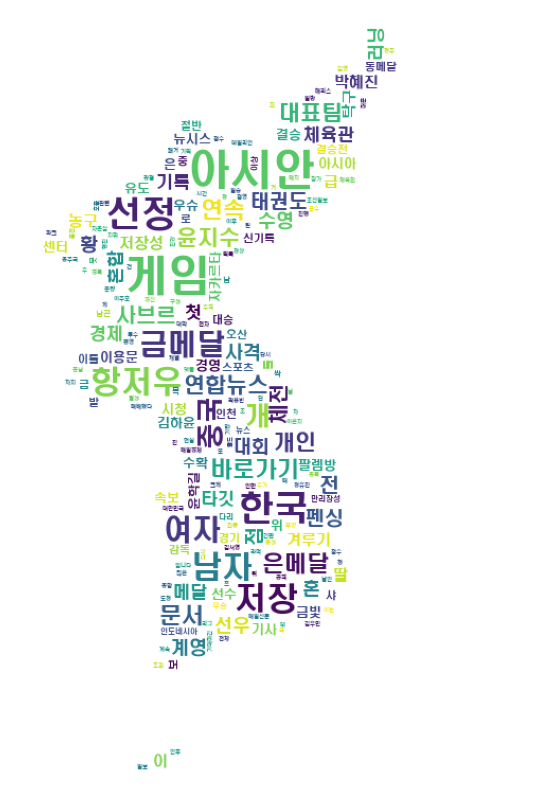

In [3]:
driver = webdriver.Chrome()
time.sleep(3)

driver.get("https://www.naver.com")
time.sleep(1)

input_keyword = driver.find_elements("css selector","input#query.search_input")[0]
input_keyword.send_keys("아시안게임")
time.sleep(1)

button = driver.find_elements("css selector","#sform > fieldset > button")[0]
button.click()
time.sleep(1)

button_news=driver.find_elements("css selector","div.api_more_wrap > a")[0]
button_news.click()
time.sleep(1)

html = driver.page_source
soup=BeautifulSoup(html,"html.parser")
asian_game_news=soup.select("section.sc_new.sp_nnews._prs_nws > div")[0].text

import konlpy
okt = konlpy.tag.Okt()
word_list=okt.pos(asian_game_news)
nouns = [word for word, tag in word_list if tag in ['Noun', 'Adjective']]

import pandas as pd
df_words=pd.DataFrame({"Noun_Adjective":nouns})
df_words=df_words.groupby("Noun_Adjective",as_index=False).agg(n=("Noun_Adjective","count")).sort_values("n",ascending=False)
df_words=df_words[~df_words["Noun_Adjective"].isin(["네이버뉴스","언론사"])]
top20=df_words.head(20)

import wordcloud
dict_words=df_words.set_index("Noun_Adjective").to_dict()["n"]

from wordcloud import WordCloud
import PIL
icon = PIL.Image.open("Republic of Korea.jpg")
img = PIL.Image.new("RGB",icon.size,(255,255,255))

import numpy as np
img.paste(icon)
img=np.array(img)

wc = WordCloud(random_state = 42,         
               font_path ="‪C:\Windows\Fonts\H2HDRM.TTF",       
               width = 400,                
               height = 400,             
               max_font_size = 40,
               min_font_size = 1,
               background_color = 'white',
               mask = img)                  
import matplotlib.pyplot as plt

img_wordcloud = wc.generate_from_frequencies(dict_words)


plt.figure(figsize = (10, 10)) 
plt.axis('off')                
plt.imshow(img_wordcloud)       